# Визуализация данных в Python

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

Построение диаграмм

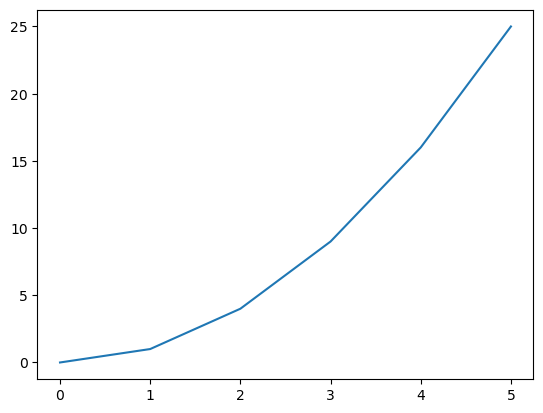

In [4]:
x = [1,2,3,4,5,6]
y = [0,1,4,9,16,25]

plt.plot(y)
plt.show()

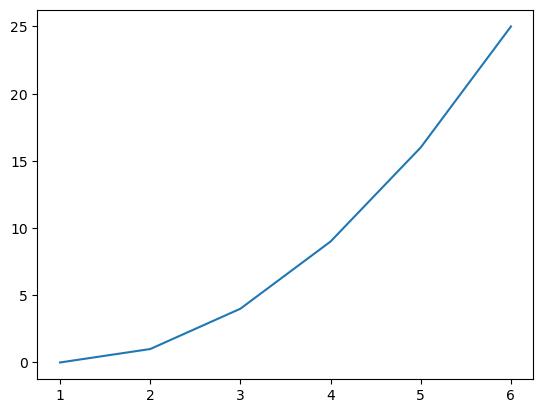

In [5]:
plt.plot(x,y)
plt.show()

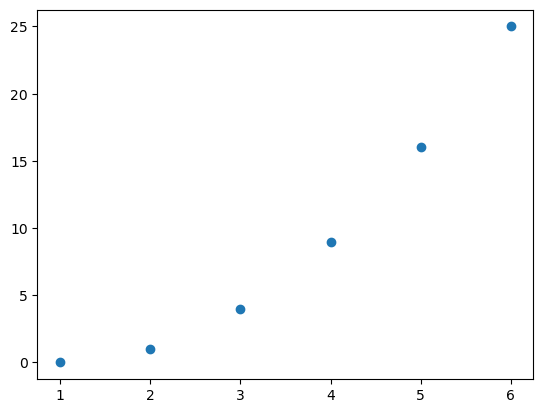

In [6]:
# Точечная диаграмма
plt.scatter(x,y)
plt.show()

Логарифмический масштаб

In [7]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars','Jupiter', 'Saturn', 'Uranus', 'Neptune']
masses = [0.055274, 0.815, 1.0, 0.107, 317.8, 95.0, 14.6, 17.147]

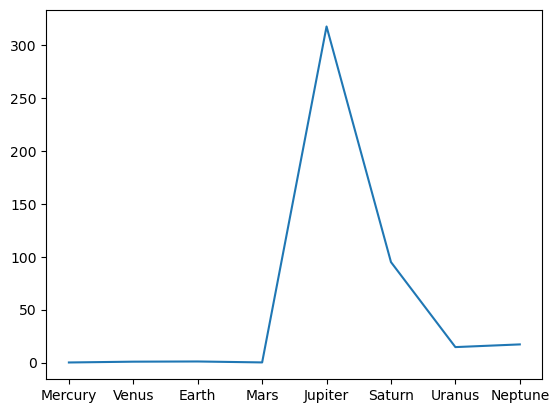

In [8]:
plt.plot(planets, masses)
plt.show()

In [9]:
masses[planets.index('Earth')]/masses[planets.index('Mercury')]

18.091688678221225

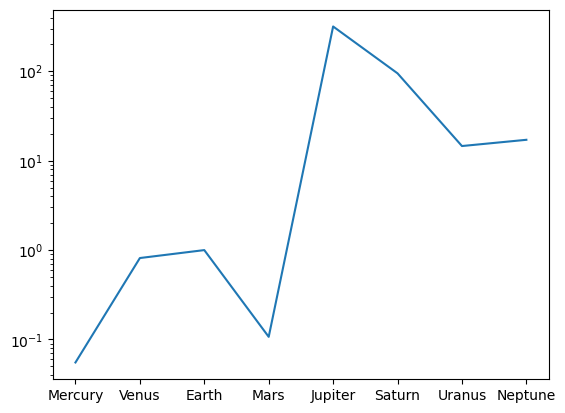

In [10]:
# Логарифмический масштаб
plt.plot(planets, masses)
plt.yscale(value='log')
plt.show()

In [11]:
planet_info = pd.Series(masses, index=planets)
planet_info

Mercury      0.055274
Venus        0.815000
Earth        1.000000
Mars         0.107000
Jupiter    317.800000
Saturn      95.000000
Uranus      14.600000
Neptune     17.147000
dtype: float64

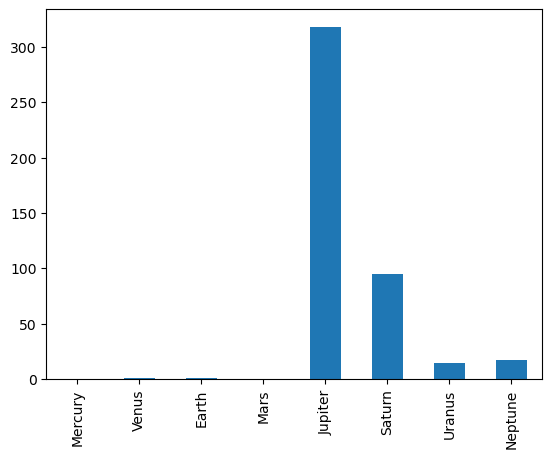

In [12]:
# Столбчатая диаграмма
planet_info.plot(kind='bar')
plt.show()

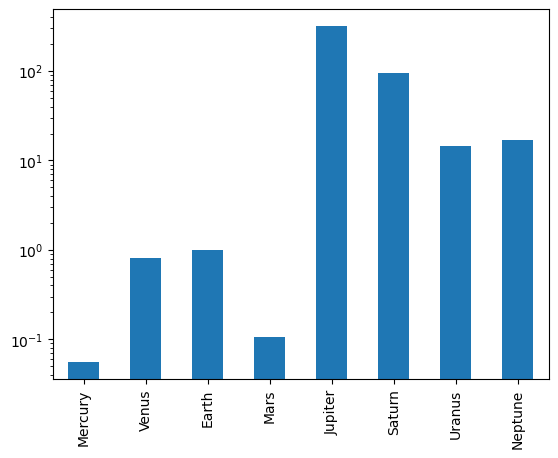

In [13]:
# Логорифмический масштаб
planet_info.plot(kind='bar', logy=True)
plt.show()

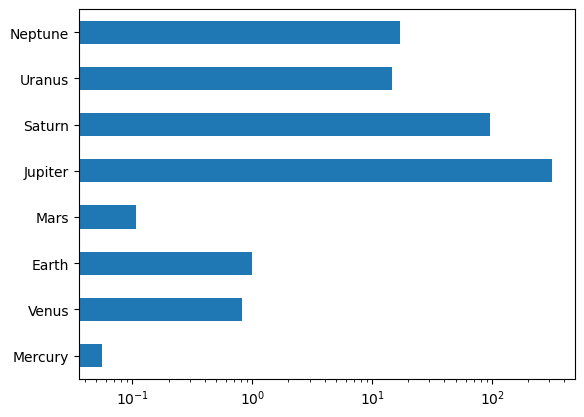

In [14]:
# Меняем ориентацию
planet_info.plot(kind='barh', logx=True)
plt.show()

In [15]:
a = [i for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

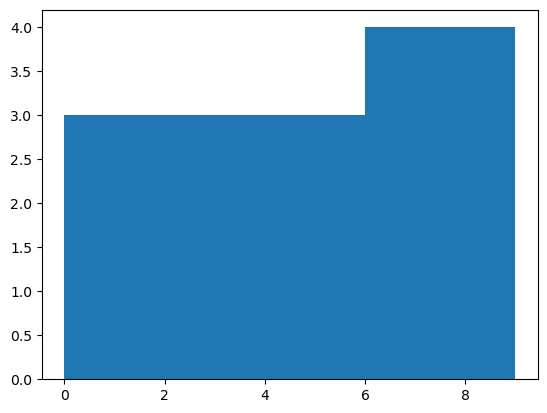

In [16]:
# Рисуем гистограмму
hist_info = plt.hist(a, bins=3)
# print(hist_info)
plt.show()

In [17]:
y

[0, 1, 4, 9, 16, 25]

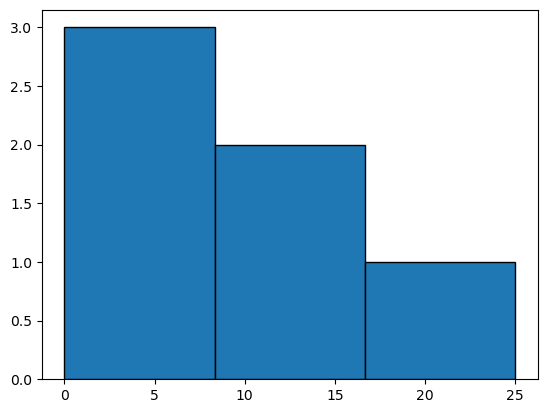

In [18]:
hist_info = plt.hist(y, bins=3, edgecolor='black')
plt.show()

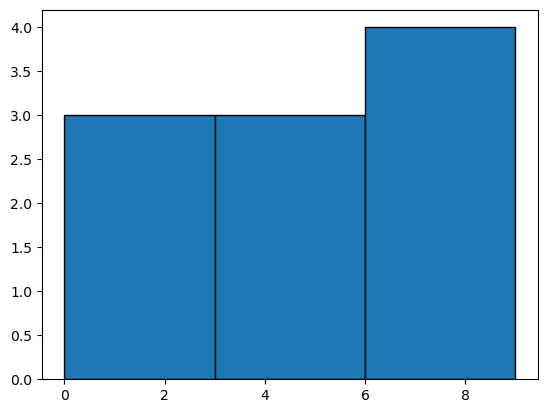

In [19]:
hist_info = plt.hist(a, bins=3, edgecolor='black')
plt.show()

# Визуализация на примере индекса Бигмака

* Индекс Бигмака  - неофициальный способ определения паритета покупательной способности

In [20]:
url = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-full-index.csv'

In [21]:
bmi = pd.read_csv(url, parse_dates=True)

In [22]:
bmi.shape

(1631, 19)

In [23]:
bmi.columns

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'USD_raw', 'EUR_raw', 'GBP_raw', 'JPY_raw', 'CNY_raw',
       'GDP_bigmac', 'adj_price', 'USD_adjusted', 'EUR_adjusted',
       'GBP_adjusted', 'JPY_adjusted', 'CNY_adjusted'],
      dtype='object')

In [24]:
bmi.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,0.11607,0.05007,-0.16722,-0.09864,1.09091,7803.328512,1.922652,0.39117,NaN,-0.06626,0.10096,0.97153
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.31176,-0.35246,-0.48645,-0.44416,0.28939,29144.876973,2.301550,-0.28335,NaN,-0.51898,-0.43285,0.01563
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.26427,-0.30778,-0.45102,-0.40581,0.37836,4822.738983,1.869734,-0.05696,NaN,-0.36704,-0.25369,0.33645
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.13448,-0.18566,-0.35417,-0.30099,0.62152,26087.329235,2.247266,-0.07698,NaN,-0.38047,-0.26953,0.30809
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.54937,0.45774,0.15609,0.25130,1.90267,23872.716095,2.207948,0.68172,NaN,0.12876,0.33090,1.38330


In [25]:
# Выберем ближайший из доступных периодов
from datetime import datetime
bmi.date = pd.to_datetime(bmi.date)
bmi['daysdelta'] = datetime.now() - bmi.date
bmi['daysdelta'] = bmi['daysdelta'].apply(lambda x:x.days)
bmi = bmi[bmi['daysdelta'] == bmi['daysdelta'].min()].copy().reset_index()
bmi.head(2)

,index,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,...,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted,daysdelta
0,1577,2022-07-01,ARE,AED,United Arab Emirates,18.0,3.67305,4.900559,-0.04844,0.02843,...,0.73235,0.37774,45059.735594,4.126598,0.04837,0.00640,0.11686,0.81952,0.21563,262
1,1578,2022-07-01,ARG,ARS,Argentina,590.0,129.11500,4.569570,-0.11270,-0.04103,...,0.61534,0.28469,8847.066934,3.497672,0.15334,0.10717,0.22869,1.00170,0.33735,262


In [26]:
bm_price_series = bmi.set_index('name')['dollar_price']
bm_price_series.head()

name
United Arab Emirates    4.900559
Argentina               4.569570
Australia               4.625680
Azerbaijan              2.767555
Bahrain                 4.244032
Name: dollar_price, dtype: float64

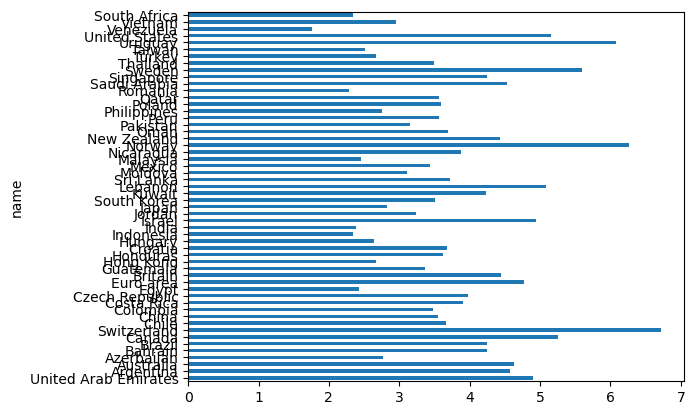

In [27]:
bm_price_series.plot(kind='barh')
plt.show()

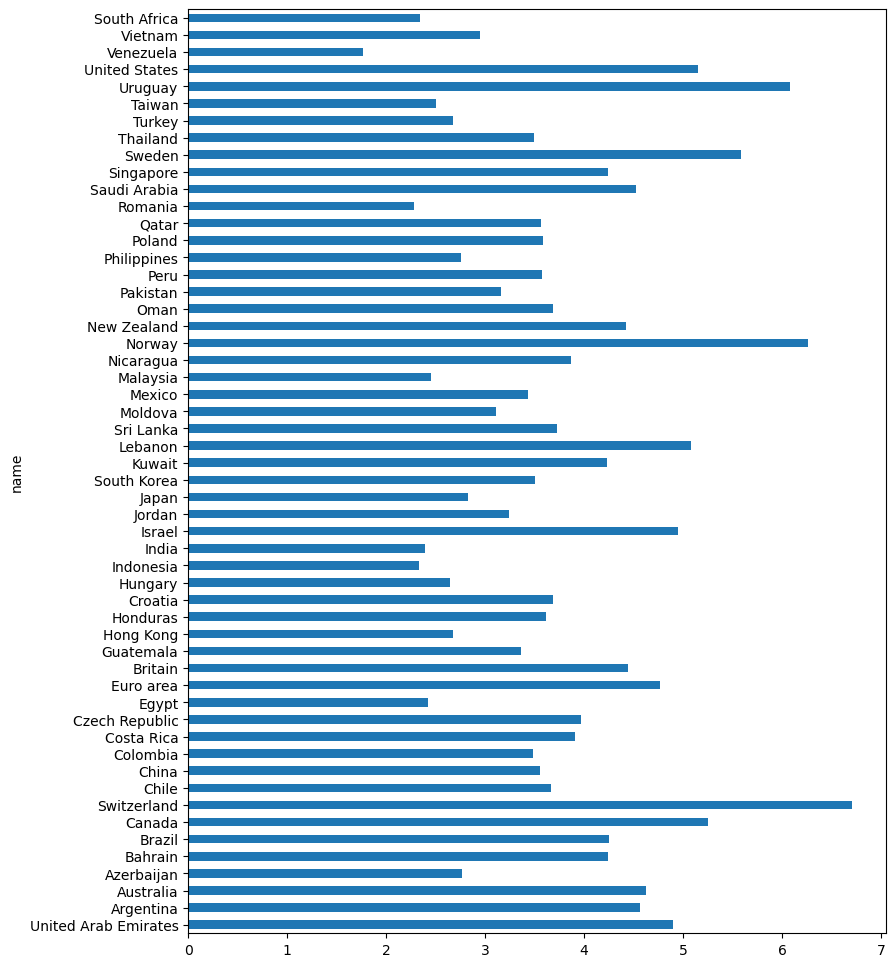

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
bm_price_series.plot(kind='barh')
plt.show()

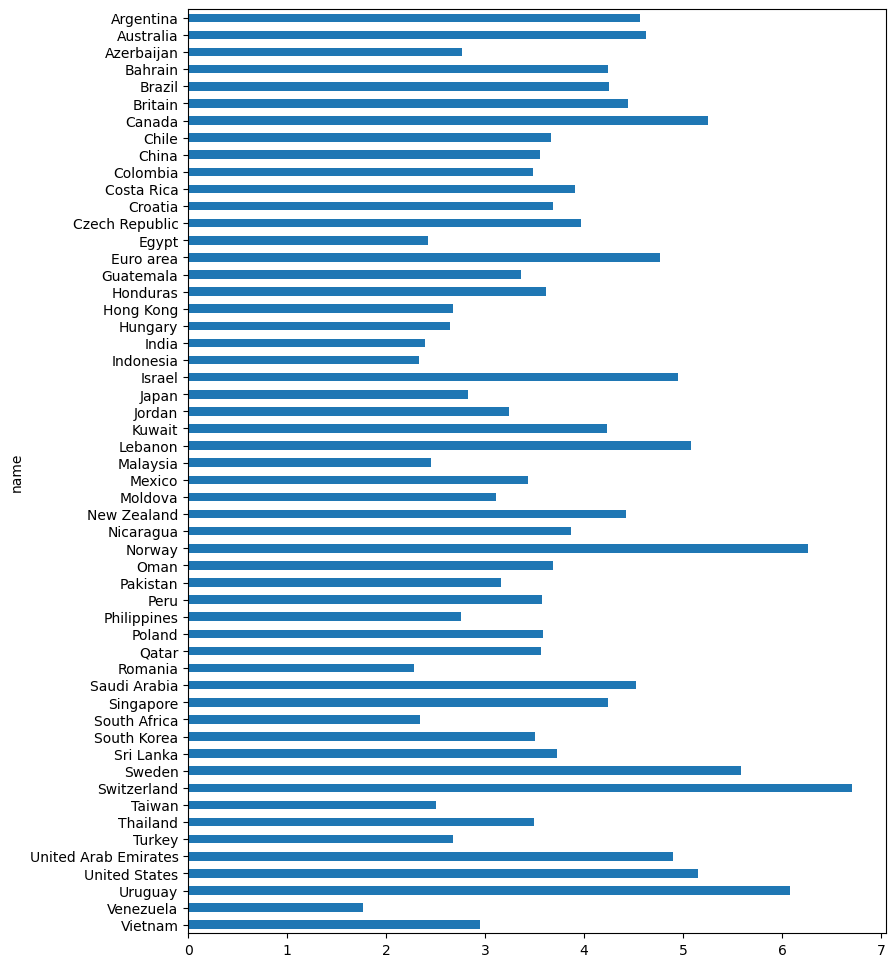

In [29]:
bm_price_series.sort_index(ascending=False).plot(kind='barh')
plt.show()

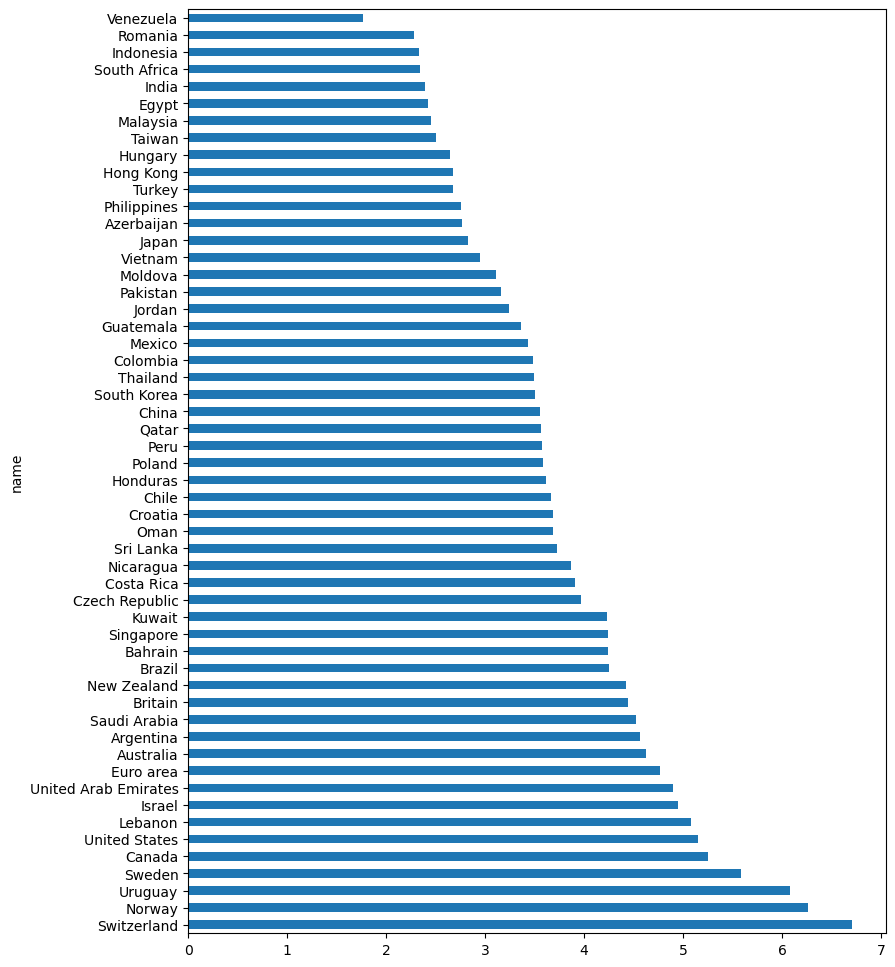

In [30]:
# Практичкеская часть
# Отсортируйте график по цене Бигмака
bm_price_series.sort_values(ascending=False).plot(kind='barh')
plt.show()

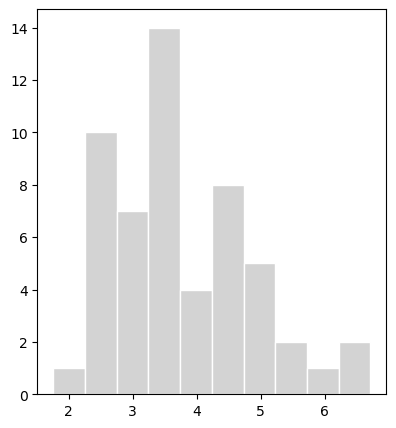

In [32]:
# Гистограмма
rcParams['figure.figsize']= 4.5,5
plt.hist(bm_price_series, ec='white', color='lightgrey')
plt.show()

In [37]:
rcParams['figure.figsize']= 4.5,5
plt.hist(bm_price_series, ec='white', color='lightgrey')
plt.savefig('figa',)
plt.close()

In [41]:
x = np.linspace(-5,5,101)

In [42]:
x2 = x**2

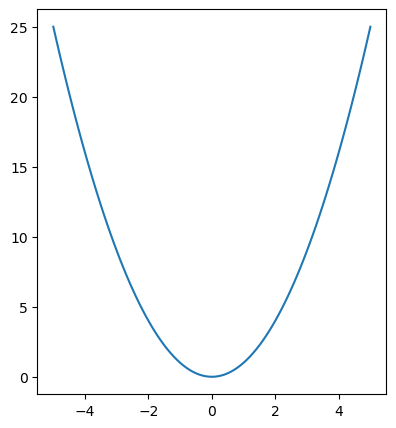

In [43]:
plt.plot(x, x**2)
plt.show()

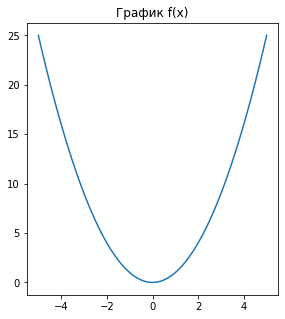

In [58]:
plt.plot(x, x2)
plt.title('График f(x)')
plt.show()

In [44]:
%config InlineBackend.figure_format = 'svg'

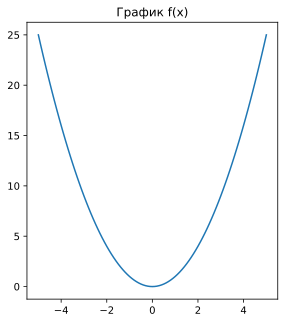

In [45]:
plt.plot(x, x2)
plt.title('График f(x)')
plt.show()

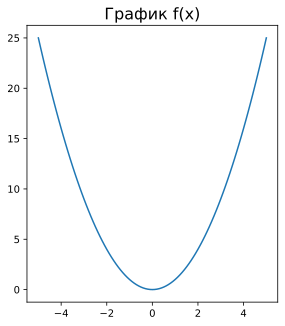

In [46]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16)
plt.show()

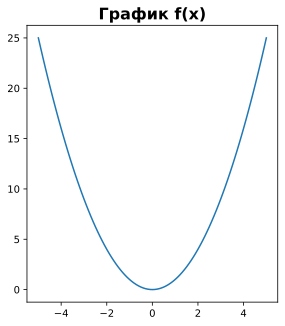

In [47]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold')
plt.show()

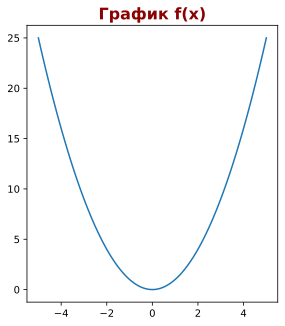

In [48]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold', color='DarkRed')
plt.show()

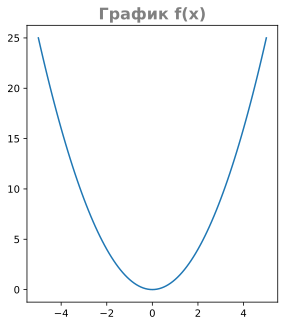

In [49]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold', color='#808080')
plt.show()

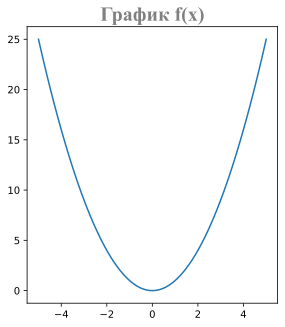

In [50]:
title_dict = {'fontsize':20, 
              'fontweight':'bold',
              'color':'#808080',
              'family':'Times New Roman'}
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict)
plt.show()

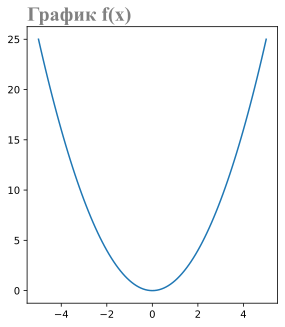

In [51]:
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict, loc='left')
plt.show()

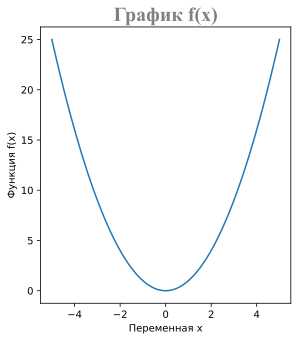

In [52]:
# Выводим названия осей
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict,)
plt.xlabel('Переменная x')
plt.ylabel('Функция f(x)')
plt.show()

In [53]:
# Создадим новую функцию
x3 = x**3
x3

array([-1.25000e+02, -1.17649e+02, -1.10592e+02, -1.03823e+02,
       -9.73360e+01, -9.11250e+01, -8.51840e+01, -7.95070e+01,
       -7.40880e+01, -6.89210e+01, -6.40000e+01, -5.93190e+01,
       -5.48720e+01, -5.06530e+01, -4.66560e+01, -4.28750e+01,
       -3.93040e+01, -3.59370e+01, -3.27680e+01, -2.97910e+01,
       -2.70000e+01, -2.43890e+01, -2.19520e+01, -1.96830e+01,
       -1.75760e+01, -1.56250e+01, -1.38240e+01, -1.21670e+01,
       -1.06480e+01, -9.26100e+00, -8.00000e+00, -6.85900e+00,
       -5.83200e+00, -4.91300e+00, -4.09600e+00, -3.37500e+00,
       -2.74400e+00, -2.19700e+00, -1.72800e+00, -1.33100e+00,
       -1.00000e+00, -7.29000e-01, -5.12000e-01, -3.43000e-01,
       -2.16000e-01, -1.25000e-01, -6.40000e-02, -2.70000e-02,
       -8.00000e-03, -1.00000e-03,  0.00000e+00,  1.00000e-03,
        8.00000e-03,  2.70000e-02,  6.40000e-02,  1.25000e-01,
        2.16000e-01,  3.43000e-01,  5.12000e-01,  7.29000e-01,
        1.00000e+00,  1.33100e+00,  1.72800e+00,  2.197

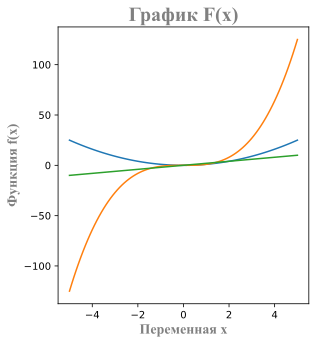

In [54]:
# Выводим 2 линии
labels_dict = {'fontsize':14, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Times New Roman'}

plt.plot(x, x2)
plt.plot(x, x3)
plt.plot(x, x*2)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.show()

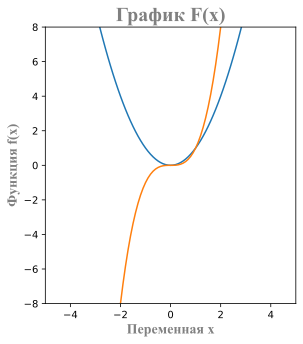

In [55]:
# Ограничиваем значения осей
plt.axis([-5,5,-8,8])
plt.plot(x, x2)
plt.plot(x, x3)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.show()

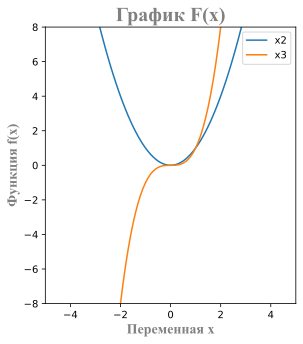

In [56]:
# Добавляем легенду
plt.axis([-5,5,-8,8])
plt.plot(x, x2)
plt.plot(x, x3)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend(labels=['x2','x3'])
plt.show()

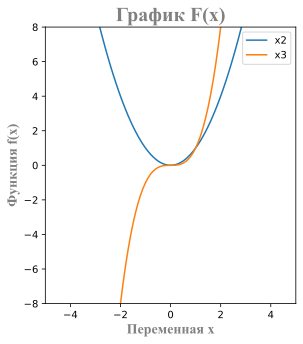

In [57]:
# Добавляем легенду в линиях
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend()
plt.show()

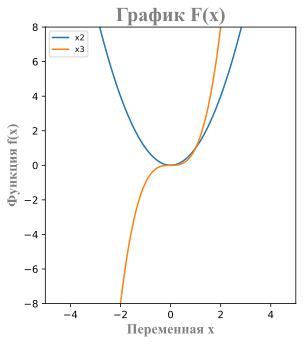

In [58]:
# Меняем локацию легенды
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend(loc='upper left', fontsize=8)
plt.show()

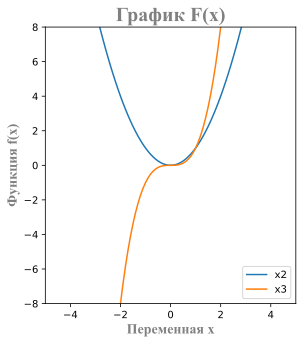

In [59]:
# Добавляем параметры легенды с помощью словаря
legend_dict = {'family':'Verdana', 'size':10}

plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend(loc='lower right', prop=legend_dict)
plt.show()

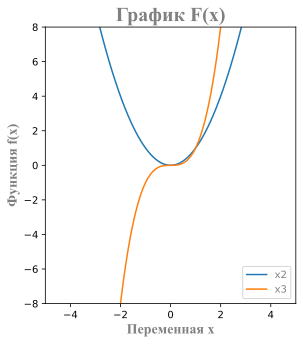

In [60]:
# Меняем параметры легенды более сложным способом
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict)
plt.setp(legend.get_texts(), color='grey')

plt.show()

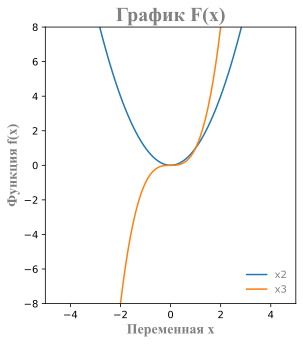

In [61]:
# Убираем рамку легенды
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

In [62]:
# Меняем форматирование линий

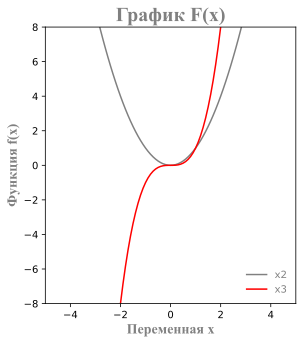

In [63]:
# меняем цвет линий
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey')
plt.plot(x, x3, label='x3', color='red')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

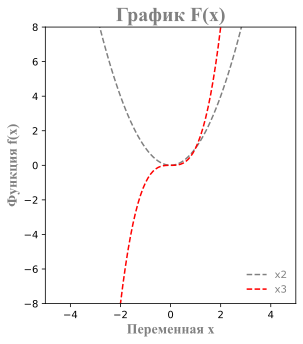

In [64]:
# Меняем стиль линий
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

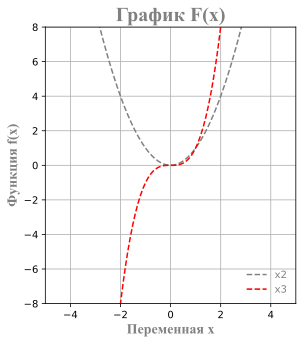

In [65]:
# Добавляем сетку на график
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid()
plt.show()

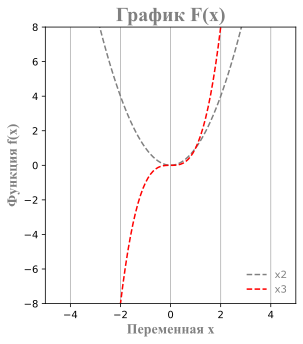

In [66]:
# Меняем линии сетки
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid(axis='x')
plt.show()

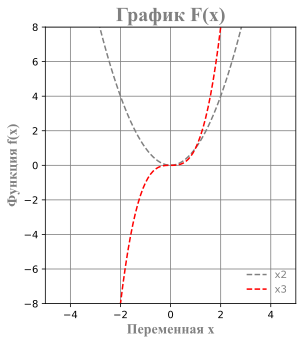

In [67]:
# Меняем цвет сетки
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid(color='grey')
plt.show()

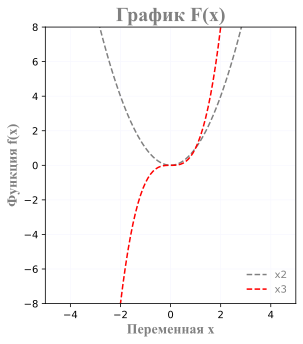

In [68]:
# Делаем цвет сетки призрачным
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid(color='ghostwhite')
plt.show()

In [69]:
# Практическая часть

In [70]:
# 1. Напишите функцию, которая на вход принимает массив x и функцию в качестве аргументов 
# и отображает эту функцию на графике

# 2. Добавьте аргумент, дающий возможность сохранения графика в файл

# 3. Добавьте аргументы, позволяющие сделать график более симпатичным

# Объектно ориентированный подход для графиков 
* Объект figure
* Объект axes
*  axes != axis  - Это разные вещи

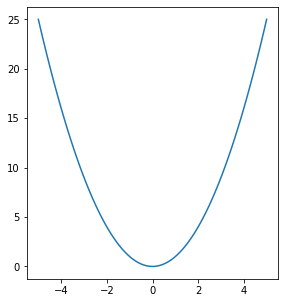

In [94]:
x = np.linspace(-5,5,101)
x2 = list(map(lambda x: x**2, x))

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(x,x2);

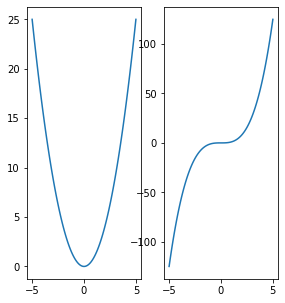

In [99]:
# Созание объектов figure и axes
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax
ax1.plot(x,x2)
ax2.plot(x,x3);

In [102]:
# ax.flatten()

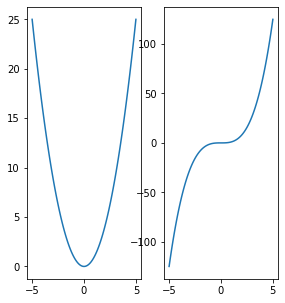

In [103]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);

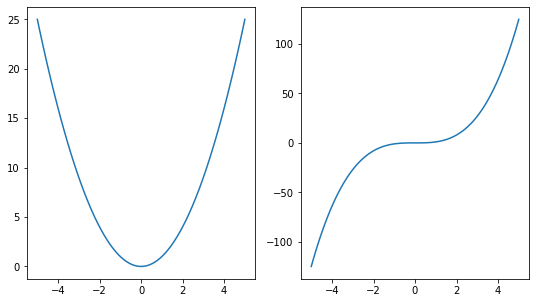

In [104]:
# Скорректируем размеры графиков
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(9,5)

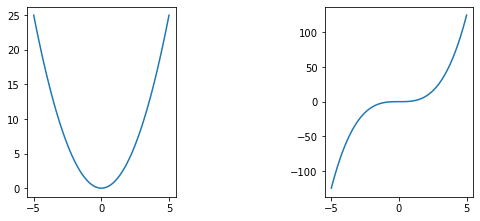

In [108]:
# Увеличим расстояние между графиками
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(8,3.5)
plt.subplots_adjust(wspace=1)

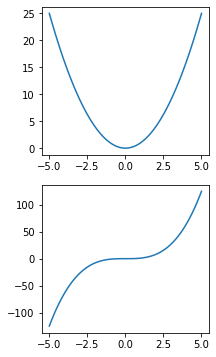

In [109]:
# Размстим графики вертикально
fig, ax = plt.subplots(nrows=2,ncols=1)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(3,6)

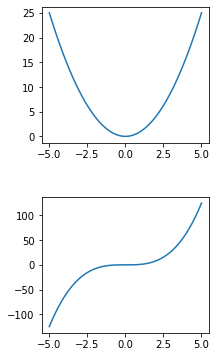

In [110]:
# Изменим расстояние между графиками
fig, ax = plt.subplots(nrows=2,ncols=1)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(3,6)
plt.subplots_adjust(hspace=0.4)

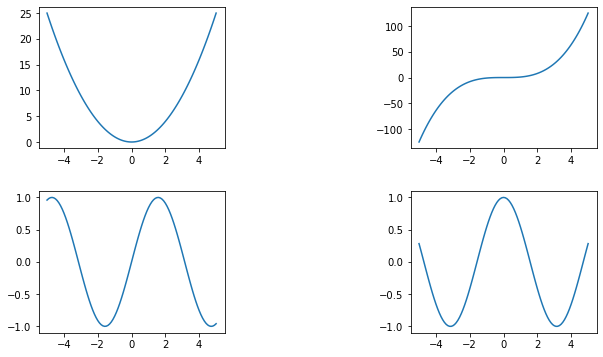

In [114]:
# Создадим 4 графика 
y = np.sin(x)
z = np.cos(x)
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3)
ax3.plot(x,y)
ax4.plot(x,z)
fig.set_size_inches(10,6)
plt.subplots_adjust(hspace=0.3,wspace=1 )

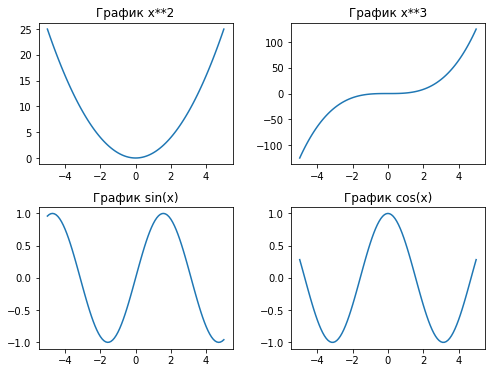

In [115]:
# Создатим заголовки для каждого графика
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )

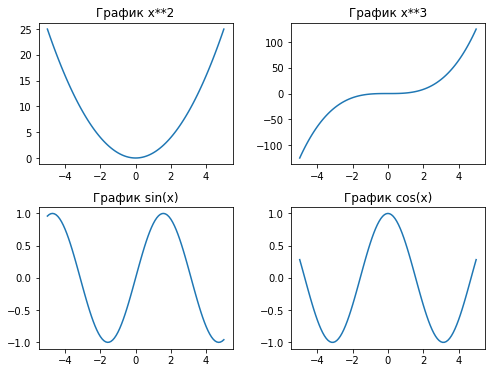

In [116]:
# Выравниваем по оси Y 
fig, ax = plt.subplots(nrows=2,ncols=2, sharey=False)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )


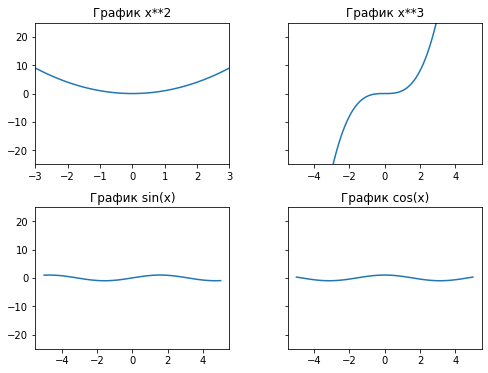

In [117]:
# Корректируем размеры осей у графиков
fig, ax = plt.subplots(nrows=2,ncols=2, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax1.set_xlim([-3,3])
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax2.set_ylim([-25,25])
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )